# CaseStudy OverView:

## Lending Club is a Marketplace for personal loans that matches borrowers who are seeking loan with investors looking to lend money and make a return

* When a borrower applies for loan to the Lending Club, Lending club has the authority to accept or reject the loan application   based on the risk factors.
* There are two types of risks - Default and Non-Default Risks.
* Default Risk: where customer fails to pay the instalments of the loan and suffers charged off and the customer is treated as   a high risk customer.
* Non-default Risk: where the customer pays the installments regularly or with some delinquency.

## Objective:

* Understanding analyzing the possible risks when the loan is provided to the Customer based on various factors.
* Data Cleaning - Removal of missing values and redundant values.
* Data Analysis - Identify the risky applicants, comparision and visualization of data.
* Recommendations

## Data Analysis

In [187]:
import numpy as np                                
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

lds = pd.read_csv(r"C:\Users\biswa\OneDrive\UPGRAD\Lending Club Case study\loan\loan.csv")

In [188]:
# Reading first 10 rows of data set
lds.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [65]:
# Information about the Dataset
lds.info

<bound method DataFrame.info of             id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0      1077501   1296599      5000        5000            4975   36 months   
1      1077430   1314167      2500        2500            2500   60 months   
2      1077175   1313524      2400        2400            2400   36 months   
3      1076863   1277178     10000       10000           10000   36 months   
4      1075358   1311748      3000        3000            3000   60 months   
...        ...       ...       ...         ...             ...         ...   
39712    92187     92174      2500        2500            1075   36 months   
39713    90665     90607      8500        8500             875   36 months   
39714    90395     90390      5000        5000            1325   36 months   
39715    90376     89243      5000        5000             650   36 months   
39716    87023     86999      7500        7500             800   36 months   

      int_rate installment grad

In [189]:
# Shape of the Dataset
lds.shape


(39717, 111)

In [190]:
# Checking the Data types of Loan Dataset
lds.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [191]:
lds.shape

(39717, 111)

In [192]:
#Identifying the missing values
lds.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [193]:
#Summing up all the missing values row-wise
lds.isnull().all(axis=1).sum()

0

In [194]:
#Summing up all the missing values column-wise
lds.isnull().all(axis=0).sum()

54

In [195]:
#Summing up all the missing values
lds.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [186]:
#Check Columns present in the dataset
lds.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type'],
      dtype='object')

In [196]:
#Dropping all the columns having null values
lds.drop(lds.iloc[:, 53:105], inplace = True, axis = 1) 

In [197]:
lds.shape

(39717, 59)

In [198]:
perc_loan_status = (lds.loan_status.value_counts()*100)/len(lds)
print(perc_loan_status)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64


In [199]:
#Checking for any duplicates based on 'id' column
print(lds.duplicated(subset=None, keep='first').count())
dup=lds[lds.duplicated(['id'])]


39717


In [200]:
# Percentage of missing column values
percentage_Col_missing = round(100*(lds.isnull().sum()/len(lds.index)),2)
print(percentage_Col_missing.to_string())

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

In [201]:
max_x = lds.loc[lds['loan_amnt'].idxmax()]
print(max_x)

id                                                                       1068994
member_id                                                                1303432
loan_amnt                                                                  35000
funded_amnt                                                                22075
funded_amnt_inv                                                          22050.0
term                                                                   60 months
int_rate                                                                  17.27%
installment                                                               551.84
grade                                                                          D
sub_grade                                                                     D3
emp_title                                              tutor Per ini Corporation
emp_length                                                               3 years
home_ownership              

In [202]:
min_x = lds.loc[lds['loan_amnt'].idxmin()]
print(min_x)

id                                                                        312505
member_id                                                                 312443
loan_amnt                                                                    500
funded_amnt                                                                  500
funded_amnt_inv                                                            450.0
term                                                                   36 months
int_rate                                                                   9.76%
installment                                                                16.08
grade                                                                          B
sub_grade                                                                     B2
emp_title                                             Hughes, Hubbard & Reed LLP
emp_length                                                               7 years
home_ownership              

In [203]:
maxAnnual_inc = lds.loc[lds['annual_inc'].idxmax()]
print(maxAnnual_inc.to_string())

id                                                                        513542
member_id                                                                 663575
loan_amnt                                                                   5000
funded_amnt                                                                 5000
funded_amnt_inv                                                           5000.0
term                                                                   36 months
int_rate                                                                  12.73%
installment                                                               167.84
grade                                                                          C
sub_grade                                                                     C1
emp_title                                                            post office
emp_length                                                             10+ years
home_ownership              

In [177]:
minAnnual_inc = lds.loc[lds['annual_inc'].idxmin()]
print(minAnnual_inc.to_string())

id                                                                           434740
member_id                                                                    518840
loan_amnt                                                                      2000
funded_amnt                                                                    2000
funded_amnt_inv                                                              2000.0
term                                                                      36 months
int_rate                                                                     13.22%
installment                                                                   67.61
grade                                                                             C
sub_grade                                                                        C2
emp_title                                                      Publix Super Markets
emp_length                                                                 <

In [204]:
#Dropping Columns having missing values greater than 90%
drop_col_list1 = ["tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","mths_since_last_major_derog","next_pymnt_d","mths_since_last_record"]
lds.drop(labels = drop_col_list1, axis =1, inplace=True)


In [205]:
lds.shape

(39717, 52)

In [206]:
#Checking the percentage of missing values after dropping columns
per_Col_missing = round(100*(lds.isnull().sum()/len(lds.index)),2)
print(per_Col_missing)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [207]:
col_drop_list2 = ["member_id","url","emp_title","zip_code","tax_liens","desc","mths_since_last_delinq"]
lds.drop(labels = col_drop_list2, axis =1, inplace=True)

In [208]:
lds.shape

(39717, 45)

In [213]:
#removing the emp_length with missing values
lds=lds[~lds.emp_length.isnull()]

In [215]:
lds.shape

(38642, 45)

In [216]:
lds.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [217]:
#Format emp_length to include only numbers --helps in better analysis
lds.emp_length.fillna('0',inplace=True)
lds['emp_length']=lds.emp_length.str.extract('(\d+)')
lds.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [218]:
lds.pub_rec_bankruptcies.isnull().sum()

697

In [219]:
#Fill unknown

lds.pub_rec_bankruptcies.fillna('Unknown',inplace=True)
lds.pub_rec_bankruptcies.isnull().sum()

0

In [220]:
lds.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [221]:
#remove unwanted characters like %
lds['int_rate'] = lds['int_rate'].str.rstrip('%')
lds['revol_util'] = lds['revol_util'].str.rstrip('%')

In [222]:
pd.set_option('display.max_columns', None)
lds.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [223]:
#separating month and year
lds.issue_d = pd.to_datetime(lds.issue_d, format='%b-%y')
lds['year']=lds['issue_d'].dt.year
lds['month']=lds['issue_d'].dt.month

In [224]:
lds.shape

(38642, 47)

# Analysis

### Loan_status is grouped as 'Fully Paid','Current' and 'Charged Off'
### Fully Paid -- Consider these -- A Non Default applicant. applicant who has already paid off.
### Don't consider these. Applicant is in the process of paying.
### Charged_off -- Consider these -- Applicant has not paid the installments in due 

In [226]:
lds = lds[lds['loan_status'] != "Current"]

In [227]:
lds.shape

(37544, 47)

In [228]:
# Listing the amount columns
amount_columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
#Converting the columns into numeric data
lds[amount_columns] = lds[amount_columns].apply(pd.to_numeric)

# Univariate

In [229]:
#percentage of loan_status
percentageOf_loan_status = (lds.loan_status.value_counts()*100)/len(lds)
print(percentageOf_loan_status)

Fully Paid     85.61954
Charged Off    14.38046
Name: loan_status, dtype: float64


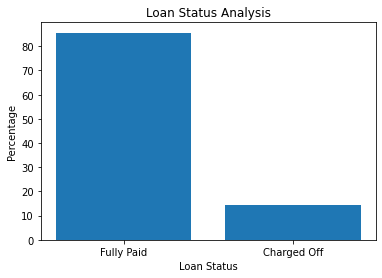

In [233]:
# Plotting bar graph for the analysis
loan_stat = ['Fully Paid', 'Charged Off']
plt.bar(loan_stat, percentageOf_loan_status )
plt.title("Loan Status Analysis")
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.show()

In [234]:
percentage_loan_purpose = (lds.purpose.value_counts()*100)/len(lds)
print(percentage_loan_purpose)

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64


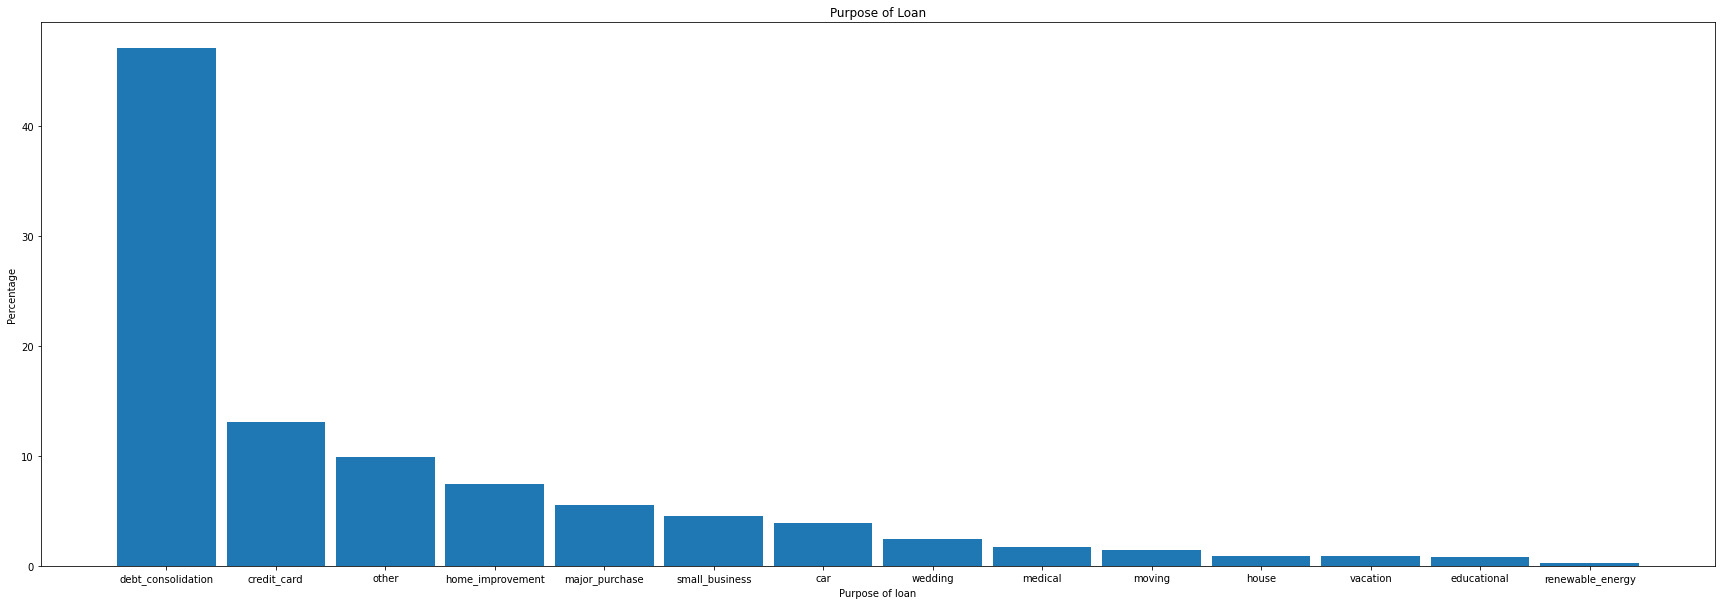

In [236]:
# graph 
plt.figure(figsize=[30, 10])
loan_purpose = ['debt_consolidation','credit_card', 'other', 'home_improvement', 'major_purchase', 'small_business', 'car', 'wedding', 'medical', 'moving', 'house', 'vacation', 'educational', 'renewable_energy']
plt.bar(loan_purpose, percentage_loan_purpose, width= 0.9, align='center')
plt.title("Purpose of Loan")
plt.xlabel('Purpose of loan')
plt.ylabel('Percentage')
plt.show()

### Customers used loans for debt consolidation

In [239]:
lds['loan_amnt'].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

[Text(0.5, 1.0, 'Analysis of Loan Amount')]

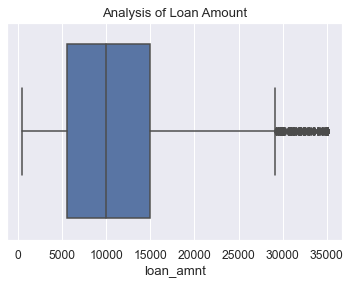

In [241]:
sns.boxplot(lds.loan_amnt).set(title = "Analysis of Loan Amount")

In [243]:
lds.total_pymnt.describe()

count    37544.000000
mean     11957.010792
std       8823.936817
min          0.000000
25%       5565.271934
50%       9777.765034
75%      16243.811330
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

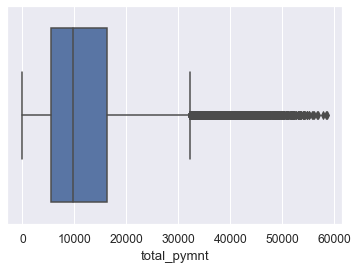

In [244]:
sns.boxplot(lds.total_pymnt)

## Removal of outliers

In [246]:
# Using .describe()

print('Before removing Outliers :\n')
print(lds['annual_inc'].describe())

# Data cleaning
# Remove Outliers .99 from Annual Income
# it will make it easier to visualize the plots.

lds = lds[lds["annual_inc"] < lds["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(lds["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before removing Outliers :

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     37165.000000
mean      65903.070210
std       35153.363496
min        4000.000000
25%       40906.000000
50%       59000.000000
75%       81600.000000
max      234996.000000
Name: annual_inc, dtype: float64


### Grades


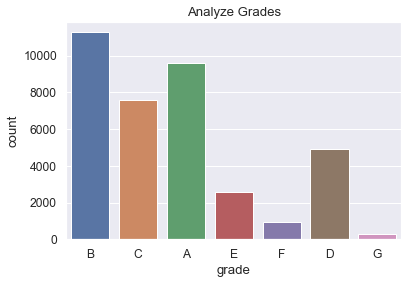

In [252]:
sns.countplot(x='grade', data=lds).set(title = "Analyze Grades")
plt.show()

## Bivariate

### - Categorize columns and creating bins to analyze

In [253]:
# Categorizing loan amounts into bins.
lds['loan_amnt_category'] = pd.cut(lds['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# Categorizing annual incomes into bins.
lds['annual_inc_category'] = pd.cut(lds['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# Categorizing intrest rates into bins.
lds['int_rate_category'] = pd.cut(lds['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# Categorizing dti into bins for bivariate analysis.
lds['dti_category'] = pd.cut(lds['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [254]:
lds.shape

(37165, 51)

In [255]:
lds.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month,loan_amnt_category,annual_inc_category,int_rate_category,dti_category
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,2011,12,0-7000,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,2011,12,0-7000,20000-40000,12.5-16,0-5
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,2011,12,0-7000,0-20000,12.5-16,05-10
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,2011,12,7000-14000,40000-60000,12.5-16,15-20
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0.0,2011,12,0-7000,20000-40000,0-10,10-15


### Annual income by Charged off Proportion:

In [256]:
# Grouping Annual Income Category with Loan Status
inc_range_vs_loan = lds.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
# Analyzing Total as sum of Chargred Off and Fully paid (Note: Current loan status have been neglected)
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']  + inc_range_vs_loan['Fully Paid'] 
# Calculation of Chargedoff Proportion for better understanding
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
# Rating the loan status in accordance with Charged off proportion
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_category,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,191,818,1009,0.189296
1,20000-40000,1421,6709,8130,0.174785
2,40000-60000,1675,9326,11001,0.152259
3,60000-80000,1002,6503,7505,0.133511
4,80000 +,1068,8452,9520,0.112185


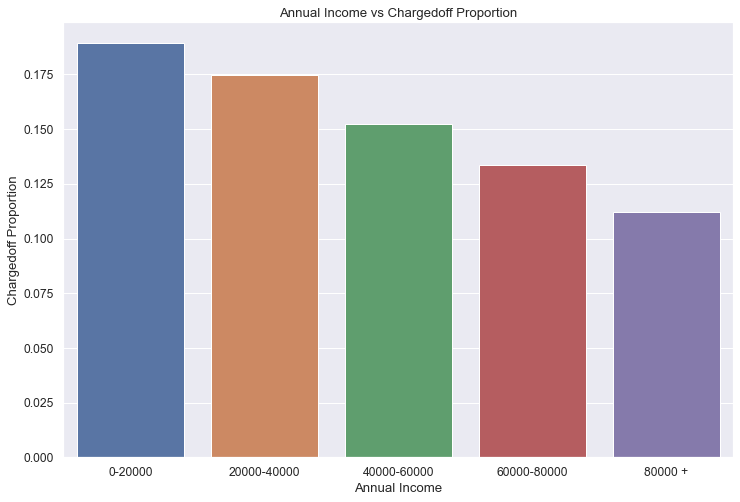

In [257]:
fig, plot = plt.subplots(figsize=(12, 8))
plot.set_title('Annual Income vs Chargedoff Proportion')
plot=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=inc_range_vs_loan)
plot.set_ylabel('Chargedoff Proportion')
plot.set_xlabel('Annual Income')
plt.show()

#### Income category of 80 K has low charged off 
#### 0-20000 are more likely of charged off
#### Annual income is inversely proportional to charged off.